In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from IPython import get_ipython

from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
  
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
data = pd.read_csv('C:/Users/dgarg/Desktop/aging/PipeDataset.csv')
data.head()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
0,151,1682,4880.722405,928.382088,35,49,1,0,0,0,0,0,43
1,80,3865,1940.107485,98.755500,41,120,1,0,0,0,0,0,24
2,74,1659,2599.669467,751.541033,27,126,1,0,0,0,0,0,15
3,132,3196,1468.885640,570.858471,13,68,0,1,0,0,0,0,23
4,125,2374,746.420442,1066.889783,5,75,0,0,1,0,0,0,2


In [3]:
data.iloc[0]

PipeAge                   151.000000
PipeDiameter             1682.000000
PipeLength               4880.722405
PipeBreakage              928.382088
PipeWallLos                35.000000
ExpectedPipeAge            49.000000
Material_CI                 1.000000
Material_Concrete           0.000000
Material_Ductile Iron       0.000000
Material_PVC                0.000000
Material_Polyethene         0.000000
Material_Steel              0.000000
PipeRUL                    43.000000
Name: 0, dtype: float64

In [4]:
print(data.shape)
data.head(2)
data.dtypes



(10000, 13)


PipeAge                    int64
PipeDiameter               int64
PipeLength               float64
PipeBreakage             float64
PipeWallLos                int64
ExpectedPipeAge            int64
Material_CI                int64
Material_Concrete          int64
Material_Ductile Iron      int64
Material_PVC               int64
Material_Polyethene        int64
Material_Steel             int64
PipeRUL                    int64
dtype: object

In [5]:
data.describe()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76.07370,1953.35430,3291.035385,547.255449,22.591500,123.92630,0.547300,0.112400,0.048000,0.046700,0.068200,0.066000,22.349400
std,43.94604,1109.98577,1896.660407,317.846802,12.786429,43.94604,0.497783,0.315874,0.213777,0.211006,0.252101,0.248295,12.758182
min,1.00000,20.00000,0.812309,0.284159,1.000000,48.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,38.00000,1000.00000,1632.562399,268.842908,11.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,77.00000,1954.50000,3272.531037,549.593356,23.000000,123.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
75%,114.00000,2904.00000,4943.290532,822.979965,34.000000,162.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
max,152.00000,3899.00000,6556.926577,1098.158096,44.000000,199.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000


In [6]:
data.isnull().sum()

PipeAge                  0
PipeDiameter             0
PipeLength               0
PipeBreakage             0
PipeWallLos              0
ExpectedPipeAge          0
Material_CI              0
Material_Concrete        0
Material_Ductile Iron    0
Material_PVC             0
Material_Polyethene      0
Material_Steel           0
PipeRUL                  0
dtype: int64

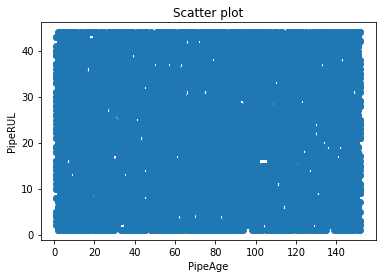

In [7]:
plt.scatter(data['PipeAge'], data['PipeRUL'])
plt.title('Scatter plot')
plt.xlabel('PipeAge')
plt.ylabel('PipeRUL')
plt.show()

In [8]:
X_data = data.iloc[ :,0:12]



In [9]:
X_data.columns

Index(['PipeAge', 'PipeDiameter', 'PipeLength', 'PipeBreakage', 'PipeWallLos',
       'ExpectedPipeAge', 'Material_CI', 'Material_Concrete',
       'Material_Ductile Iron', 'Material_PVC', 'Material_Polyethene',
       'Material_Steel'],
      dtype='object')

In [10]:
Y_data = data.iloc[ :,12]

In [11]:
print(Y_data)

0       43
1       24
2       15
3       23
4        2
        ..
9995    34
9996    38
9997    13
9998    20
9999     1
Name: PipeRUL, Length: 10000, dtype: int64


In [12]:
model = XGBRegressor()

In [13]:
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)

In [17]:
scores = cross_val_score(model, X_data, Y_data, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

def Average(lst):
    return sum(lst) / len(lst)

average_pred = Average(scores)
print (average_pred)

-11.461701711901027


In [15]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 11.462 (0.274)


In [16]:
scores = cross_val_score(model, X_data, Y_data, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [25]:
print(scores)

[-174.69532661 -177.91772278 -182.14806473 -179.23251839 -179.20261055
 -183.10521283 -190.43660765 -176.076684   -181.25299443 -178.17515893
 -172.93809792 -192.6085794  -178.63973454 -173.39500462 -190.35303547
 -190.85725872 -164.77392459 -177.98185391 -183.7401271  -168.51261244
 -184.92559968 -175.54665209 -174.79454431 -179.64930068 -184.048078
 -187.73144295 -167.69312487 -180.45801732 -174.60026324 -194.73779258
 -184.70193919 -189.29116407 -182.40144438 -176.90340752 -180.62014072
 -182.76524015 -190.71321892 -173.85623298 -180.8749897  -169.52755507
 -187.19743453 -176.24460743 -170.73728131 -191.8983403  -180.28982612
 -188.4971106  -179.11061132 -168.23404122 -178.76749098 -189.61945168
 -185.41165811 -179.04564994 -171.02095585 -179.79014747 -172.28454028
 -182.82037806 -180.00824247 -182.88296222 -181.98111186 -181.40998305]


In [26]:
scores = absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MSE: 180.319 (6.787)


In [27]:
rmse =  np.sqrt(scores.mean())

In [20]:
rmse

13.481420113547369